In [1]:
import pandas as pd
from collections import Counter
import datetime
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('../Output/train_step1.csv') # 训练集数据加载

In [3]:
test_df = pd.read_csv('../Data/round1_ijcai_18_test_a_20180301/round1_ijcai_18_test_a_20180301.txt', sep=' ') # 测试集数据加载

In [2]:
# 获得每个字段的缺失值样本数 原数据中缺失值为-1
def getDetailOfNAN(df):
    for col in df.columns:
        print (col + ': %d' % df[df[col]==-1].shape[0])
        
# 不同离散型特征具有不同的取值
def numberOfColValues(df):
    for col in df.columns:
        print (col + ': %d 特异值' % len(set(df[col])))

# 获得指定特征字段的详细情况，（特异值分布和样本分布）
def getDetailColumns(df):
    lens = df.shape[0]
    for col in ['item_brand_id', 'item_city_id', 'item_id', 'user_id', 'context_id','shop_id','item_category_0','item_category_1','item_category_2','item_property_0','item_property_1','item_property_2','predict_category_property_0','predict_category_property_1','predict_category_property_2']:
        values = len(set(df[col]))
        print (col + '   %d   ' % values)
        print ("平均每个特异值有%d个样本数" % (lens/values))


# 数据类型转化： 时间日期列context_timestamp

In [5]:
time_temp = datetime.datetime.fromtimestamp(df['context_timestamp'][0])  # unix时间戳转化成时间
print (time_temp)
print (dir(time_temp))  # day/minute/month/weeday()/

2018-09-18 10:09:04
['__add__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__radd__', '__reduce__', '__reduce_ex__', '__repr__', '__rsub__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', 'astimezone', 'combine', 'ctime', 'date', 'day', 'dst', 'fold', 'fromordinal', 'fromtimestamp', 'hour', 'isocalendar', 'isoformat', 'isoweekday', 'max', 'microsecond', 'min', 'minute', 'month', 'now', 'replace', 'resolution', 'second', 'strftime', 'strptime', 'time', 'timestamp', 'timetuple', 'timetz', 'today', 'toordinal', 'tzinfo', 'tzname', 'utcfromtimestamp', 'utcnow', 'utcoffset', 'utctimetuple', 'weekday', 'year']


# 对dataframe数据进行统计描述：

In [6]:
df.describe()
# test_df.describe()

,instance_id,item_id,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,user_id,user_gender_id,...,context_timestamp,context_page_id,shop_id,shop_review_num_level,shop_review_positive_rate,shop_star_level,shop_score_service,shop_score_delivery,shop_score_description,is_trade
count,4.781380e+05,4.781380e+05,4.781380e+05,4.781380e+05,478138.000000,478138.00000,478138.000000,478138.000000,4.781380e+05,478138.000000,...,4.781380e+05,478138.000000,4.781380e+05,478138.000000,478138.000000,478138.000000,478138.000000,478138.000000,478138.000000,478138.000000
mean,4.613082e+18,4.594622e+18,4.838444e+18,5.500420e+18,6.777175,11.13384,12.199336,17.128676,4.609864e+18,0.213047,...,1.537502e+09,4003.362366,4.733842e+18,15.768353,0.994830,5013.175240,0.971124,0.970497,0.974863,0.018867
std,2.663448e+18,2.710140e+18,2.694756e+18,2.464881e+18,1.089037,2.58886,2.497312,2.160745,2.663355e+18,0.514699,...,1.726222e+05,4.019709,2.596118e+18,2.825294,0.011972,2.590989,0.023817,0.023776,0.025024,0.136055
min,3.823219e+12,6.964907e+14,-1.000000e+00,-1.000000e+00,0.000000,-1.00000,0.000000,0.000000,2.477979e+13,-1.000000,...,1.537200e+09,4001.000000,1.543560e+15,0.000000,-1.000000,4999.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.308543e+18,2.251088e+18,2.357806e+18,3.948283e+18,6.000000,10.00000,11.000000,16.000000,2.302761e+18,0.000000,...,1.537351e+09,4001.000000,2.498543e+18,14.000000,0.992779,5012.000000,0.966360,0.965684,0.969268,0.000000
50%,4.613478e+18,4.636270e+18,5.051040e+18,6.738284e+18,7.000000,11.00000,12.000000,17.000000,4.608490e+18,0.000000,...,1.537506e+09,4001.000000,4.629590e+18,16.000000,1.000000,5013.000000,0.972347,0.971590,0.978493,0.000000
75%,6.920994e+18,7.007158e+18,7.565625e+18,7.534239e+18,8.000000,13.00000,14.000000,19.000000,6.914375e+18,0.000000,...,1.537635e+09,4004.000000,6.740687e+18,17.000000,1.000000,5015.000000,0.977822,0.976978,0.983640,0.000000
max,9.223362e+18,9.221980e+18,9.222396e+18,9.151271e+18,17.000000,17.00000,17.000000,21.000000,9.223345e+18,2.000000,...,1.537805e+09,4020.000000,9.220773e+18,25.000000,1.000000,5020.000000,1.000000,1.000000,1.000000,1.000000


 某些字段的取值范围可以进行缩放
 
    user_age_level-1000
    user_occupation_id-2000
    user_star_level-3000
    context_page_id-4000
    shop_star_level-4999

In [7]:
# 获得每个字段的缺失值样本数 原数据中缺失值为-1
getDetailOfNAN(df)
# getDetailOfNAN(test_df)

instance_id: 0
item_id: 0
item_category_list: 0
item_property_list: 0
item_brand_id: 473
item_city_id: 277
item_price_level: 0
item_sales_level: 913
item_collected_level: 0
item_pv_level: 0
user_id: 0
user_gender_id: 12902
user_age_level: 964
user_occupation_id: 964
user_star_level: 964
context_id: 0
context_timestamp: 0
context_page_id: 0
predict_category_property: 0
shop_id: 0
shop_review_num_level: 0
shop_review_positive_rate: 7
shop_star_level: 0
shop_score_service: 59
shop_score_delivery: 59
shop_score_description: 59
is_trade: 0


具有缺失值的特征列为：

    item_city_id,item_brand_id,item_sales_level,
    user_gender_id,user_age_level,user_occupation_id,user_star_level,
    shop_review_positive_rate,shop_score_service,shop_score_delivery,shop_score_description

缺失值处理方法：

    1、直接删除，不超过样本数的2%,若缺失值占95%且特征不是很重要，则可以选择删除整条特征列
    2、采用均值或者中位数（统计值）来进行填补
    3、忽略不作处理
    4、就近选取最相近的对象最近填补或者K近邻均值填补
    5、建模预测：回归、随机森林、聚类均值等

In [8]:
Counter(df['user_gender_id'])

Counter({-1: 12902, 0: 360817, 1: 94070, 2: 10349})

# 缺失值处理

缺失值的样本量占总样本量的百分比很小，可以直接删除

    shop_score_service: 59
    shop_score_delivery: 59
    shop_score_description: 59
    shop_review_positive_rate: 7
    item_brand_id: 473
    item_city_id: 277

In [9]:
# 对训练集中部分特征值为NAN的样本进行删除
df = df[df['shop_review_positive_rate']!=-1]
df = df[df['shop_score_delivery']!=-1]
df = df[df['shop_score_description']!=-1]
df = df[df['shop_score_service']!=-1]
df = df[df['item_brand_id']!=-1]
df = df[df['item_city_id']!=-1]

df = df.reset_index(drop=True) # 删除部分具有缺失值样本后重新更新数据集的index

# 3 对部分字段进行数据标准化等转化方式
归一化

In [10]:
def dataNormalization(df):
    df.user_age_level = df.user_age_level.replace(-1,999)
    df.user_age_level = df.user_age_level - 1000

    df.user_occupation_id = df.user_occupation_id.replace(-1,1999)
    df.user_occupation_id = df.user_occupation_id - 2000

    df.user_star_level = df.user_star_level.replace(-1,2999)
    df.user_star_level = df.user_star_level - 3000

    df.context_page_id = df.context_page_id - 4000

    df.shop_star_level = df.shop_star_level - 4999
    
    return df

df = dataNormalization(df)
test_df = dataNormalization(test_df)

缺失值的样本量较多，且达不到完全舍弃该特征的水平，需要进行填补或插补

    item_sales_level
    user_gender_id （后面one-hot处理）
    user_age_level
    user_occupation_id（后面one-hot处理）
    user_star_level
暂时没有头绪，忽略

# 特征提取

数据转化

    item_category_list
    item_property_list
    predict_category_property
是广告类目列表，根目录;子目录;子子目录
对该字段进行分割，提取叶节点

In [11]:
def dataConvert(df):
    for i in range(3):
        df['item_category_%d'%i] = df['item_category_list'].apply(lambda str1: int(str1.split(';')[i]) if len(str1.split(';'))>i else -1)
    df = df.drop(['item_category_list'], 1)
    for i in range(3):
        df['item_property_%d'%i] = df['item_property_list'].apply(lambda str1: int(str1.split(';')[i]) if len(str1.split(';'))>i else -1)
    df = df.drop(['item_property_list'], 1)
    for i in range(3):
        df['predict_category_property_%d'%i] = df['predict_category_property'].apply(lambda str1: int(str1.split(';')[i].split(':')[0]) \
                                                                                     if len(str1.split(';'))>i else -1)
    df = df.drop(['predict_category_property'], 1)
    return df

df = dataConvert(df)
test_df = dataConvert(test_df)

In [12]:
# 由于instance_id为案例ID，无实际参考价值，可以丢弃
# item_category_list,predict_category_property三个字段为非简单数值类型，暂时不考虑

# df = df.drop(['instance_id'], 1) # axis 0:index; 1:column

In [13]:
# 不同离散型特征具有不同的取值

# numberOfColValues(df)
numberOfColValues(test_df)

instance_id: 18371 特异值
item_id: 3695 特异值
item_brand_id: 1101 特异值
item_city_id: 99 特异值
item_price_level: 10 特异值
item_sales_level: 18 特异值
item_collected_level: 18 特异值
item_pv_level: 21 特异值
user_id: 13573 特异值
user_gender_id: 4 特异值
user_age_level: 9 特异值
user_occupation_id: 5 特异值
user_star_level: 12 特异值
context_id: 18371 特异值
context_timestamp: 15592 特异值
context_page_id: 20 特异值
shop_id: 2015 特异值
shop_review_num_level: 21 特异值
shop_review_positive_rate: 1302 特异值
shop_star_level: 20 特异值
shop_score_service: 1963 特异值
shop_score_delivery: 1961 特异值
shop_score_description: 1959 特异值
item_category_0: 1 特异值
item_category_1: 13 特异值
item_category_2: 3 特异值
item_property_0: 129 特异值
item_property_1: 83 特异值
item_property_2: 120 特异值
predict_category_property_0: 80 特异值
predict_category_property_1: 102 特异值
predict_category_property_2: 129 特异值


数据类型转化

    context_timestamp
将context_timestamp字段进行维度转化成hour/min/hour*60+min和day

In [14]:
def timeStampConvert(df):
    df['context_time'] = [datetime.datetime.fromtimestamp(df['context_timestamp'][i]).hour * 60 + \
                               datetime.datetime.fromtimestamp(df['context_timestamp'][i]).minute for i in range(df.shape[0])]
    # df['context_time_minute'] = [datetime.datetime.fromtimestamp(df['context_timestamp'][i]).minute for i in range(df.shape[0])]
    df['context_time_weekday'] = [datetime.datetime.fromtimestamp(df['context_timestamp'][i]).weekday() for i in range(df.shape[0])]
    # df['context_time'] = df['context_time_hour'] * 60 + df['context_time_minute']
    # df = df.drop(['context_timestamp'], 1) # context_time 包含hour和minute信息
    return df

df = timeStampConvert(df)
test_df = timeStampConvert(test_df)

In [15]:
# df.shape
# df.info()
df.head()

,instance_id,item_id,item_brand_id,item_city_id,item_price_level,item_sales_level,item_collected_level,item_pv_level,user_id,user_gender_id,...,item_category_1,item_category_2,item_property_0,item_property_1,item_property_2,predict_category_property_0,predict_category_property_1,predict_category_property_2,context_time,context_time_weekday
0,108641074714126964,3412720377098676069,1975590437749032870,3948283326616421003,3,3,4,14,4505772604969228686,1,...,5799347067982556520,-1,2072967855524022579,5131280576272319091,2636395404473730413,5799347067982556520,509660095530134768,5755694407684602296,609,1
1,5754713551599725161,3412720377098676069,1975590437749032870,3948283326616421003,3,3,4,14,2692638157208937547,0,...,5799347067982556520,-1,2072967855524022579,5131280576272319091,2636395404473730413,5799347067982556520,7908382889764677758,-1,720,1
2,842679481291040981,3412720377098676069,1975590437749032870,3948283326616421003,3,3,4,14,5247924392014515924,0,...,5799347067982556520,-1,2072967855524022579,5131280576272319091,2636395404473730413,5799347067982556520,7258015885215914736,7908382889764677758,184,1
3,937088850059189027,3412720377098676069,1975590437749032870,3948283326616421003,3,3,4,14,2681414445369714628,1,...,5799347067982556520,-1,2072967855524022579,5131280576272319091,2636395404473730413,509660095530134768,5799347067982556520,7908382889764677758,377,1
4,7975697065017708072,3412720377098676069,1975590437749032870,3948283326616421003,3,3,4,14,2729475788342039013,0,...,5799347067982556520,-1,2072967855524022579,5131280576272319091,2636395404473730413,5799347067982556520,7908382889764677758,-1,1188,1


# 数据分析部分

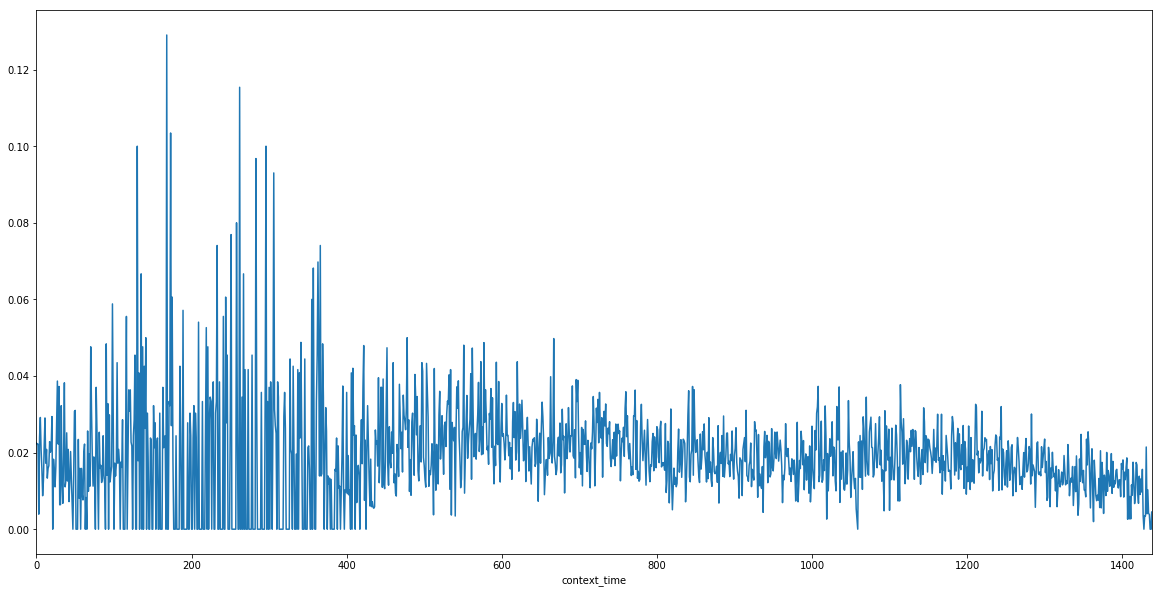

In [16]:
df['is_trade'].groupby(df['context_time']).mean().plot(figsize=(20,10))

图：以18日-24日这几天所有时间段（分）的转化率分布图
凌晨的转化率数据波动剧烈

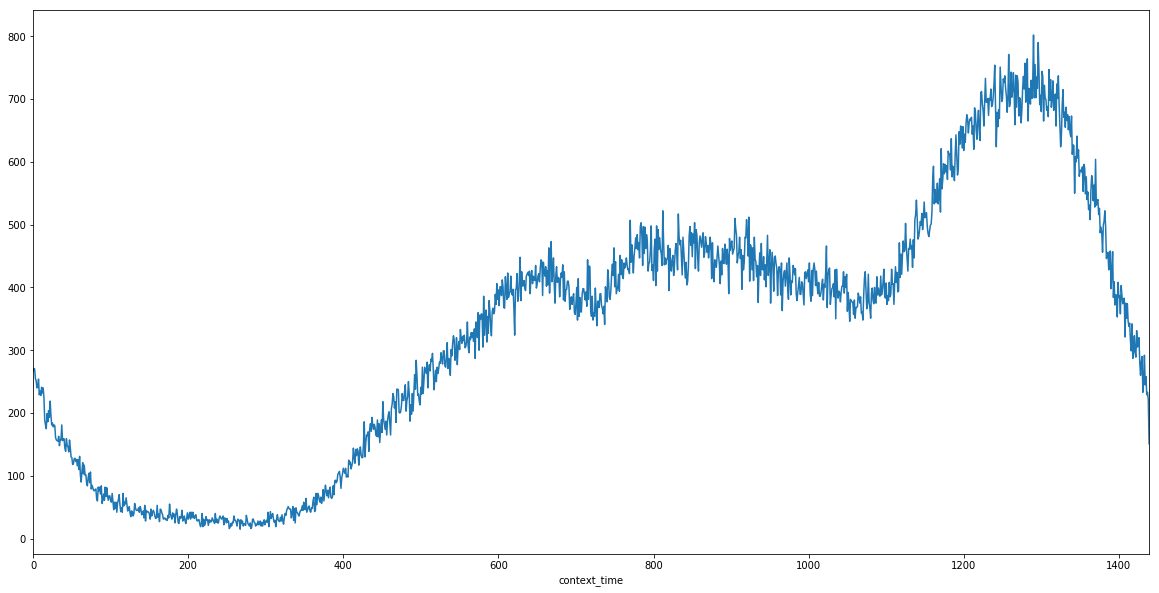

In [17]:
df.groupby(df['context_time']).apply(lambda df1:df1.shape[0]).plot(figsize=(20,10))

图： 18日-24日之间每天不同时间段的广告点击量分布图
凌晨的点击数量远小于白天，数据中那预测的点击率是在凌晨发生的，注意数据的不平衡问题

In [18]:
df.to_csv('../Output/train_step2.csv', index=False)
test_df.to_csv('../Output/test_step2.csv', index=False)

In [3]:
df = pd.read_csv('../Output/train_step2.csv') # 预处理后的测试集数据加载
test_df = pd.read_csv('../Output/test_step2.csv') # 预处理后的测试集数据加载

特殊变量（字符转化变量）-不连续数字或者文本

    item_brand_id
    item_city_id
    
    item_id
    user_id
    context_id 舍弃
    shop_id
    
    item_category_0: 1 特异值    舍弃
    item_category_1: 13 特异值
    item_category_2: 3 特异值
    item_property_0: 216 特异值
    item_property_1: 122 特异值
    item_property_2: 189 特异值
    predict_category_property_0: 283 特异值
    predict_category_property_1: 396 特异值
    predict_category_property_2: 457 特异值

In [4]:
rows = df.shape[0]
label = df['is_trade']
df1 = df.drop(['is_trade'], 1).append(test_df)

In [5]:
# 获得指定特征字段的详细情况，（特异值分布和样本分布）
getDetailColumns(df1)

item_brand_id   2061   
平均每个特异值有240个样本数
item_city_id   128   
平均每个特异值有3872个样本数
item_id   10155   
平均每个特异值有48个样本数
user_id   207403   
平均每个特异值有2个样本数
context_id   495678   
平均每个特异值有1个样本数
shop_id   3963   
平均每个特异值有125个样本数
item_category_0   1   
平均每个特异值有495705个样本数
item_category_1   13   
平均每个特异值有38131个样本数
item_category_2   3   
平均每个特异值有165235个样本数
item_property_0   217   
平均每个特异值有2284个样本数
item_property_1   122   
平均每个特异值有4063个样本数
item_property_2   192   
平均每个特异值有2581个样本数
predict_category_property_0   287   
平均每个特异值有1727个样本数
predict_category_property_1   405   
平均每个特异值有1223个样本数
predict_category_property_2   472   
平均每个特异值有1050个样本数


context_id基本为样例的标识值，对应文本的编号，1个样本平均对应1个context_id，故舍弃

item_category_0为样本的特定值，变动不大，训练集中几乎都一样

In [6]:
def dropCols(df):
    return df.drop(['context_id','item_category_0'], 1)

df1 = dropCols(df1)

对不连续的数字或者文本进行标号LabelEncoder

    item_id
    item_city_id
    item_brand_id
    item_category_1, item_category_2
    item_property_0, item_property_1, item_property_2
    user_id
    shop_id
    predict_category_property_0, predict_category_property_1, predict_category_property_2


In [7]:
def dataLabelEncoder(df):
    df['item_category_1'] = pd.Categorical(df['item_category_1']).codes
    df['item_category_2'] = pd.Categorical(df['item_category_2']).codes

    df['item_property_0'] = pd.Categorical(df['item_property_0']).codes
    df['item_property_1'] = pd.Categorical(df['item_property_1']).codes
    df['item_property_2'] = pd.Categorical(df['item_property_2']).codes

    df['predict_category_property_0'] = pd.Categorical(df['predict_category_property_0']).codes
    df['predict_category_property_1'] = pd.Categorical(df['predict_category_property_1']).codes
    df['predict_category_property_2'] = pd.Categorical(df['predict_category_property_2']).codes

    df['shop_id'] = pd.Categorical(df['shop_id']).codes
    df['item_brand_id'] = pd.Categorical(df['item_brand_id']).codes
    df['item_city_id'] = pd.Categorical(df['item_city_id']).codes
    df['user_id'] = pd.Categorical(df['user_id']).codes
    df['item_id'] = pd.Categorical(df['item_id']).codes
    return df


df_enc = dataLabelEncoder(df1)
del df1

离散变量：有序特征--分类数据

    user_occupation_id 用户的预测职业编号：为分类值，采用one-hot编码实现特征数值化
    user_gender_id
  连续特征
  
    item_price_level
    item_sales_level (-1)
    item_collected_level
    item_pv_level
    user_age_level (-1)
    user_star_level (-1)
    shop_review_num_level
    shop_star_level
   
    context_page_id
    
    context_time_weekday
    context_time

In [8]:
# 不同离散型特征具有不同的取值
numberOfColValues(df_enc)

instance_id: 495652 特异值
item_id: 10155 特异值
item_brand_id: 2061 特异值
item_city_id: 128 特异值
item_price_level: 14 特异值
item_sales_level: 18 特异值
item_collected_level: 18 特异值
item_pv_level: 22 特异值
user_id: 207403 特异值
user_gender_id: 4 特异值
user_age_level: 9 特异值
user_occupation_id: 5 特异值
user_star_level: 12 特异值
context_timestamp: 297135 特异值
context_page_id: 20 特异值
shop_id: 3963 特异值
shop_review_num_level: 24 特异值
shop_review_positive_rate: 13011 特异值
shop_star_level: 21 特异值
shop_score_service: 18204 特异值
shop_score_delivery: 18258 特异值
shop_score_description: 18301 特异值
item_category_1: 13 特异值
item_category_2: 3 特异值
item_property_0: 217 特异值
item_property_1: 122 特异值
item_property_2: 192 特异值
predict_category_property_0: 287 特异值
predict_category_property_1: 405 特异值
predict_category_property_2: 472 特异值
context_time: 1440 特异值
context_time_weekday: 7 特异值


In [9]:
df_enc.shape
# df['item_category_0'] = df['item_category_0'].astype(np.int64)

(495705, 32)

In [10]:
# 由于user_occupation_id 为无序离散值，one-hot离散化
df_enc = pd.get_dummies(df_enc, columns =['user_occupation_id', 'user_gender_id','item_sales_level','user_age_level','user_star_level','item_category_1','item_category_2','item_property_0','item_property_1','item_property_2','predict_category_property_0','predict_category_property_1','predict_category_property_2','shop_id','item_brand_id','item_city_id','user_id','item_id'], spares=True)
print (df_enc.shape)

MemoryError: 

In [10]:

.label = pd.DataFrame({'is_trade':label})
test_df = df_enc[rows:]
df = df_enc[0:rows].merge(label, left_index=True, right_index=True)
del df_enc, rows

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 477334 entries, 0 to 477333
Data columns (total 76 columns):
instance_id                    477334 non-null int64
item_id                        477334 non-null int16
item_brand_id                  477334 non-null int16
item_city_id                   477334 non-null int16
item_price_level               477334 non-null int64
item_collected_level           477334 non-null int64
item_pv_level                  477334 non-null int64
user_id                        477334 non-null int32
context_timestamp              477334 non-null int64
context_page_id                477334 non-null int64
shop_id                        477334 non-null int16
shop_review_num_level          477334 non-null int64
shop_review_positive_rate      477334 non-null float64
shop_star_level                477334 non-null int64
shop_score_service             477334 non-null float64
shop_score_delivery            477334 non-null float64
shop_score_description         4773

连续变量：

    shop_review_positive_rate
    shop_score_service
    shop_score_delivery
    shop_score_description
    

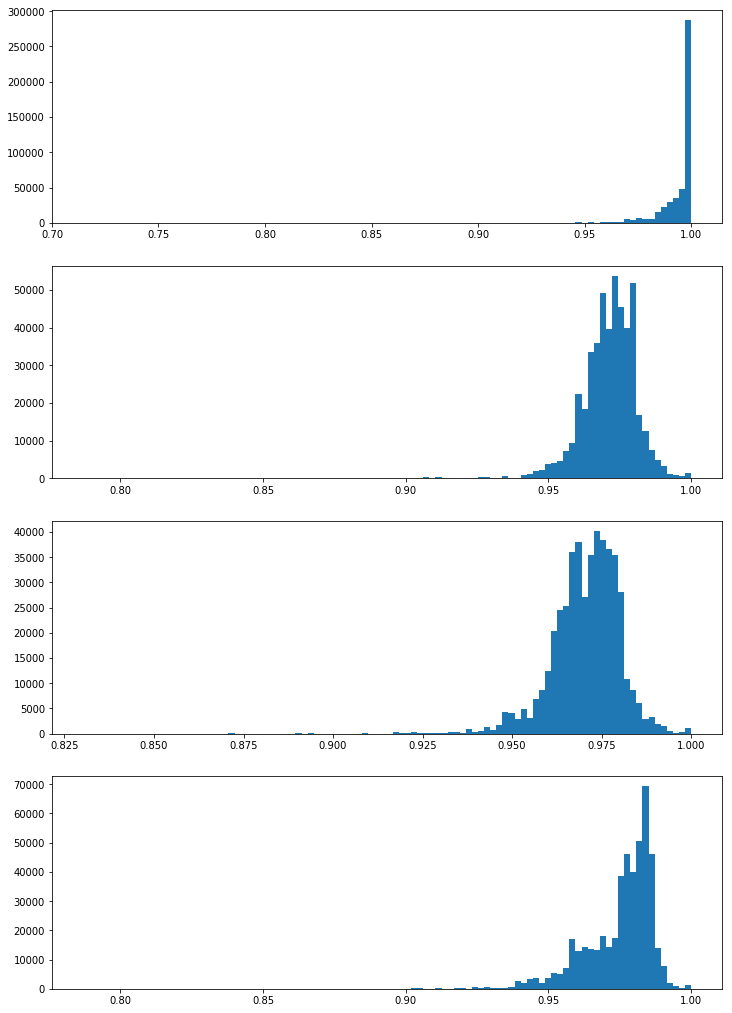

In [21]:
# 对连续变量特征进行直方图分析
import matplotlib.pyplot as plt 

plt.figure(figsize=(12,18))
plt.subplot(4,1,1)
plt.hist(df['shop_review_positive_rate'], 100)
plt.subplot(4,1,2)
plt.hist(df['shop_score_service'], 100)
plt.subplot(4,1,3)
plt.hist(df['shop_score_delivery'], 100)
plt.subplot(4,1,4)
plt.hist(df['shop_score_description'], 100)
plt.show()

根据连续变量的直方图分析，对连续变量进行二值化处理，针对LR模型

In [22]:
df[['shop_review_positive_rate','shop_score_service', 'shop_score_delivery', 'shop_score_description']].describe()

,shop_review_positive_rate,shop_score_service,shop_score_delivery,shop_score_description
count,477334.000000,477334.000000,477334.000000,477334.000000
mean,0.994869,0.971364,0.970737,0.975115
std,0.009212,0.009361,0.009275,0.012029
min,0.714286,0.786667,0.830000,0.786667
25%,0.992807,0.966363,0.965684,0.969299
50%,1.000000,0.972347,0.971582,0.978493
75%,1.000000,0.977812,0.976951,0.983639
max,1.000000,1.000000,1.000000,1.000000


In [20]:
# df = df[df.shop_review_positive_rate>=0.95]
# df = df[df.shop_score_service>=0.925]
# df = df[df.shop_score_delivery>=0.9]
# df = df[df.shop_score_description>=0.91]

# df['shop_review_positive_rate'] = df['shop_review_positive_rate'].apply(lambda x:int(x>=0.95)
# df['shop_score_service'] = df['shop_score_service'].apply(lambda x:int(x>=0.925)
# df['shop_score_delivery'] = df['shop_score_delivery'].apply(lambda x:int(x>=0.9)
# df['shop_score_description'] = df['shop_score_description'].apply(lambda x:int(x>=0.91)

# 数据处理完毕，保存

In [12]:
df.to_csv('../Output/train_step3.csv', index=False)
test_df.to_csv('../Output/test_step3.csv', index=False)